## KNN model

**An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
We are exploring the possibility in predicting income level based on the individual’s personal information.**

Data is taken from 
<a href="https://www.kaggle.com/wenruliu/adult-income-dataset">link</a>

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import chart_studio.plotly as ply
import cufflinks as cf
cf.go_offline()
%matplotlib inline
import plotly.express as px

In [186]:
df = pd.read_csv('adult.csv')

In [189]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Exploring Data

the object and numerical data are being seperated

In [194]:
def obj_columns(data):
    return list(data.select_dtypes(include='object'))

def numerical_columns(data):
    return list(data.select_dtypes(exclude='object'))

object_vars = obj_columns(df)
num_vars = numerical_columns(df)
var_info = (object_vars,num_vars) 
var_info

(['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'gender',
  'native-country',
  'income'],
 ['age',
  'fnlwgt',
  'educational-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'])

In [195]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

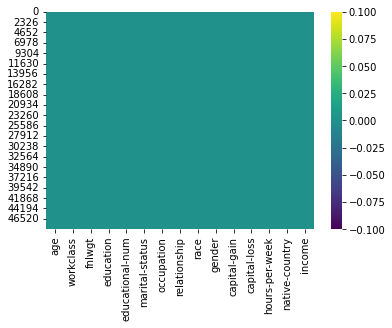

In [196]:
sns.heatmap(df.isnull(), cmap='viridis')

In [199]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**All object data are turned to numerical by encoding them**

In [198]:
object_vars

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [200]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in object_vars:
    df[i] = lb.fit_transform(df[i])
    
# df['workclass']=lb.fit_transform(df['workclass'])
# df['education']=lb.fit_transform(df['education'])
# df['marital-status']=lb.fit_transform(df['marital-status'])
# df['occupation']=lb.fit_transform(df['occupation'])
# df['relationship']=lb.fit_transform(df['relationship'])
# df['race']=lb.fit_transform(df['race'])
# df['gender']=lb.fit_transform(df['gender'])
# df['native-country']=lb.fit_transform(df['native-country'])
# df['income']=lb.fit_transform(df['income'])

In [202]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1


In [203]:
df.corr()['income'].sort_values(ascending=False)

income             1.000000
educational-num    0.332613
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
gender             0.214628
capital-loss       0.147554
education          0.080091
occupation         0.076722
race               0.070934
workclass          0.052674
native-country     0.012210
fnlwgt            -0.006339
marital-status    -0.199072
relationship      -0.253214
Name: income, dtype: float64

In [204]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
df[num_vars] = norm.fit_transform(df[num_vars])

In [210]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.000110,4,1.0,1,0.000031,4,7,3,2,1,0.0,0.0,0.000176,39,0
1,0.000423,4,1.0,11,0.000100,2,5,0,4,1,0.0,0.0,0.000557,39,0
2,0.000083,2,1.0,7,0.000036,2,11,0,4,1,0.0,0.0,0.000119,39,1


In [90]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# df[num_vars]= ss.fit_transform(df[num_vars])
# df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995129,4,0.351675,1,-1.197259,4,7,3,2,1,-0.144804,-0.217127,-0.034087,39,0
1,-0.046942,4,-0.945524,11,-0.419335,2,5,0,4,1,-0.144804,-0.217127,0.772930,39,0
2,-0.776316,2,1.394723,7,0.747550,2,11,0,4,1,-0.144804,-0.217127,-0.034087,39,1


### KNN modeling

**first we check what k value works better**

### Deciding the best k value:

In [211]:
Error =[]
for i in range(1,15):
    lm = KNeighborsClassifier(n_neighbors=i)
    lm.fit(x_train,y_train)
    predictions = lm.predict(x_test)
    Error.append(np.mean(predictions != y_test)) # average of where the predictions were not equal to labels


    


In [212]:
Error_rate = pd.DataFrame(Error, columns = ['Error_rate'])
Error_rate.head(3)

,Error_rate
0,0.203440
1,0.185900
2,0.183375


In [ ]:
#1: plot using plt.plot:
plt.figure(figsize=(10,7))
plt.plot(range(1,15),Error)

#2: plot using iplot:
Error_rate.iplot(title='Error')

In [217]:
#3: plot using line plot:
fig = px.line(Error_rate, x=range(1,15), y="Error_rate", title='Error Visualization', 
              labels={"x":"K Value","Error_rate":"Error Value"})
fig.show()

**It turns out that k=13 is the best value for classification**

In [218]:
from sklearn.model_selection import train_test_split
x= df.drop('income', axis=1)
y= df['income']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3 , random_state= 42)

In [219]:
from sklearn.neighbors import KNeighborsClassifier
lm = KNeighborsClassifier(n_neighbors=13)
lm.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [220]:
predictions = lm.predict(x_test)

In [221]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.87      0.93      0.89     11233
           1       0.68      0.53      0.59      3420

    accuracy                           0.83     14653
   macro avg       0.77      0.73      0.74     14653
weighted avg       0.82      0.83      0.82     14653



In [222]:
print(accuracy_score(y_test,predictions))

0.8324575172319661
